# Visualize embeddings of HSN Test set

This Notebook visualizes embeddings that were extracted using the extract_embeddings callback, to use it copy the callback args into an experiment config

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
def visualize_embeddings(embeddings_path, labels_path,name):
    # Load the saved files
    embeddings = np.load(embeddings_path)
    labels = np.load(labels_path)

    # Convert one-hot labels to class indices if needed
    if labels.ndim == 2 and labels.shape[1] > 1:
        labels = np.argmax(labels, axis=1)

    # Confirm shapes
    print(f"Embeddings shape: {embeddings.shape}")
    print(f"Labels shape: {labels.shape}")

    # normalize embeddings
    embeddings = StandardScaler().fit_transform(embeddings) #! Recheck but leave for now as it makes sense

    # Run t-SNE
    tsne = TSNE(n_components=2, perplexity=30, max_iter=1500, random_state=42) #! Recheck these values again but should be ok
    embeddings_2d = tsne.fit_transform(embeddings)
    #print(f"t-SNE output shape: {embeddings_2d.shape}")
    # Plotting
    plt.figure(figsize=(10, 8))
    unique_labels = np.unique(labels)
    cmap = plt.colormaps.get_cmap('tab20')  # Updated syntax

    for i, label in enumerate(unique_labels):
        idx = labels == label
        plt.scatter(
            embeddings_2d[idx, 0],
            embeddings_2d[idx, 1],
            label=str(label),
            alpha=0.7,
            s=40,
            color=cmap(i % 20)  # avoid IndexError if more than 20 classes
        )

    plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f"t-SNE Visualization of Embeddings for {name}")
    plt.xlabel("t-SNE Dim 1")
    plt.ylabel("t-SNE Dim 2")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"embedding_outputs/{name}_emb.png", dpi=300)
    plt.show()

Embeddings shape: (12000, 1280)
Labels shape: (12000,)


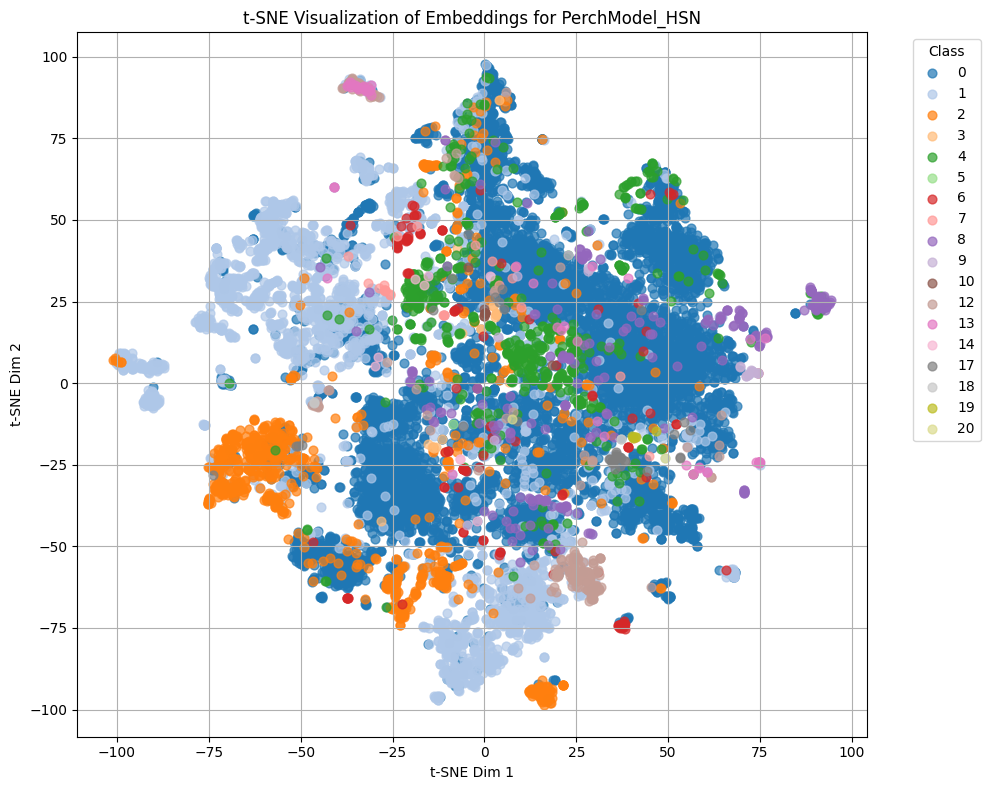

Embeddings shape: (12000, 768)
Labels shape: (12000,)


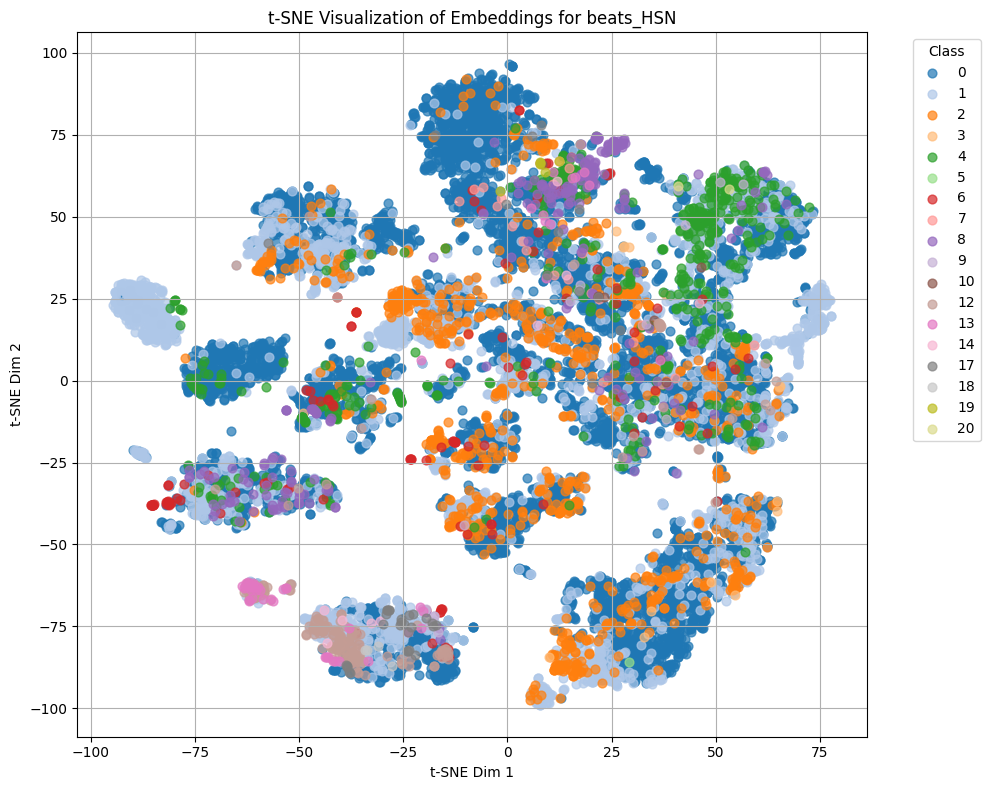

Embeddings shape: (12000, 768)
Labels shape: (12000,)


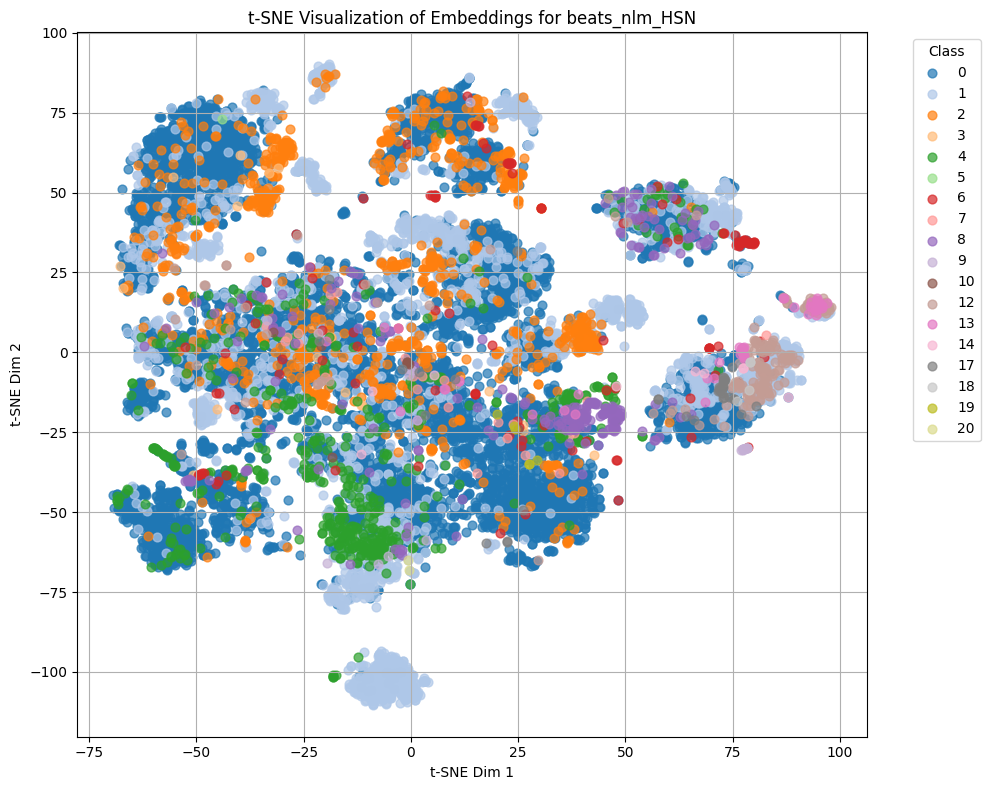

In [5]:
names = ["PerchModel","beats","beats_nlm"]
datasets = ["HSN"]

for dataset in datasets:
    for name in names:
        embeddings_path = f"embedding_outputs/{dataset}/{name}.npy"
        labels_path = f"embedding_outputs/{dataset}/labels_{name}.npy"
        visualize_embeddings(embeddings_path, labels_path, name+f"_{dataset}")